# Python for Data Science

### Dependencies
- Python=3.6
- Pandas
- Jupyter
- Matplotlib
- Numpy
- Scipy
### Additional dependencies for plotting data over map.
- basemap
- basemap-data-hires

## Introduction
We are going to analyze the New York [Vehicle Collision Dataset](https://www.kaggle.com/new-york-city/nypd-motor-vehicle-collisions#nypd-motor-vehicle-collisions.csv). 
The dataset has been unzipped and the resulting size is around 350MB.

**Check file size and see if a header is present.**

In [1]:
!ls -l  nypd-motor-vehicle-collisions.csv

-rw-rw-r--. 1 farhanhubble farhanhubble 360338035 Jun 30 00:10 nypd-motor-vehicle-collisions.csv


In [2]:
!head -1 nypd-motor-vehicle-collisions.csv

DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5


## Load and Clean Data

**Load the Dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [4]:
data = pd.read_csv('./nypd-motor-vehicle-collisions.csv',header=0)

/home/farhanhubble/anaconda3/envs/sapient/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print('Data shape:',data.shape)
data.head()

Data shape: (1294012, 29)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26T00:00:00,0:00,BROOKLYN,11215,40.667470,-73.979290,"{'longitude': '-73.97929', 'needs_recoding': F...",NaN,NaN,506 7 STREET,...,Unspecified,NaN,NaN,NaN,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26T00:00:00,0:00,BROOKLYN,11218,40.641113,-73.966324,"{'longitude': '-73.966324', 'needs_recoding': ...",NaN,NaN,358 ARGYLE ROAD,...,Unspecified,NaN,NaN,NaN,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26T00:00:00,0:00,MANHATTAN,10065,40.766666,-73.967070,"{'longitude': '-73.96707', 'needs_recoding': F...",EAST 65 STREET,PARK AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,3930150,Sedan,Sedan,NaN,NaN,NaN
3,2018-06-26T00:00:00,0:00,NaN,NaN,40.826275,-73.859710,"{'longitude': '-73.85971', 'needs_recoding': F...",BRUCKNER BOULEVARD,WHITE PLAINS ROAD,NaN,...,Unspecified,NaN,NaN,NaN,3929327,Sedan,Sedan,NaN,NaN,NaN
4,2018-06-26T00:00:00,0:00,NaN,NaN,40.699265,-73.727170,"{'longitude': '-73.72717', 'needs_recoding': F...",CROSS ISLAND PARKWAY,NaN,NaN,...,Unspecified,NaN,NaN,NaN,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


**Drop some not-so-useful columns**

In [6]:
data.drop(labels=['ZIP CODE',\
                  'LOCATION',\
                  'ON STREET NAME',\
                  'CROSS STREET NAME',\
                  'OFF STREET NAME',\
                  'CONTRIBUTING FACTOR VEHICLE 2',\
                  'CONTRIBUTING FACTOR VEHICLE 3',\
                  'CONTRIBUTING FACTOR VEHICLE 4',\
                  'CONTRIBUTING FACTOR VEHICLE 5'],axis=1,inplace=True)

In [7]:
print('Data shape:',data.shape)
data.head()

Data shape: (1294012, 20)


,DATE,TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-06-26T00:00:00,0:00,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2018-06-26T00:00:00,0:00,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,2018-06-26T00:00:00,0:00,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN
3,2018-06-26T00:00:00,0:00,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN
4,2018-06-26T00:00:00,0:00,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


**Combine first two columns and convert to date-time type.**

In [8]:
dates = data.DATE.apply(lambda x:x[:-9])
times = data.TIME

In [9]:
data.drop(columns=['DATE','TIME'],inplace=True)
data.head()

,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN
3,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN
4,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


In [10]:
data['TIME'] = pd.to_datetime(dates+' '+times)

In [11]:
data.head()

,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
0,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
1,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
2,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
3,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
4,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2018-06-26


**Check which columns have NaN**

In [12]:
data.isnull().any()

BOROUGH                           True
LATITUDE                          True
LONGITUDE                         True
NUMBER OF PERSONS INJURED        False
NUMBER OF PERSONS KILLED         False
NUMBER OF PEDESTRIANS INJURED    False
NUMBER OF PEDESTRIANS KILLED     False
NUMBER OF CYCLIST INJURED        False
NUMBER OF CYCLIST KILLED         False
NUMBER OF MOTORIST INJURED       False
NUMBER OF MOTORIST KILLED        False
CONTRIBUTING FACTOR VEHICLE 1     True
UNIQUE KEY                       False
VEHICLE TYPE CODE 1               True
VEHICLE TYPE CODE 2               True
VEHICLE TYPE CODE 3               True
VEHICLE TYPE CODE 4               True
VEHICLE TYPE CODE 5               True
TIME                             False
dtype: bool

**Removes NaN in Latitude/Longitude**

In [13]:
print(data.LONGITUDE.isnull().sum(),data.LONGITUDE.isnull().sum())

220121 220121


In [14]:
data.dropna(axis=0,how='any',subset=['LATITUDE','LONGITUDE'],inplace=True)

In [15]:
print(data.shape)
data.head()

(1073891, 19)


,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
0,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
1,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
2,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
3,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
4,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2018-06-26


**Drop rows where all vehicle data is NaN**

In [16]:
data.dropna(axis=0,how='all',subset=['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)

In [17]:
print(data.shape)
data.head()

(1064990, 19)


,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
0,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
1,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
2,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
3,NaN,40.826275,-73.859710,0,0,0,0,0,0,0,0,Turning Improperly,3929327,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
4,NaN,40.699265,-73.727170,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,3929108,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2018-06-26


**Drop rows where borough is unknown**. 

In [18]:
data.dropna(axis=0,subset=['BOROUGH'], inplace=True)

In [19]:
print(data.shape)
data.head()

(877419, 19)


,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,TIME
0,BROOKLYN,40.667470,-73.979290,0,0,0,0,0,0,0,0,Passing Too Closely,3929455,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
1,BROOKLYN,40.641113,-73.966324,0,0,0,0,0,0,0,0,Unspecified,3929457,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-26
2,MANHATTAN,40.766666,-73.967070,0,0,0,0,0,0,0,0,Tire Failure/Inadequate,3930150,Sedan,Sedan,NaN,NaN,NaN,2018-06-26
5,BRONX,40.844788,-73.891680,1,0,0,0,1,0,0,0,Driver Inattention/Distraction,3930216,Sedan,Bike,NaN,NaN,NaN,2018-06-26
6,BROOKLYN,40.606007,-73.955830,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,3929796,Pick-up Truck,Sedan,NaN,NaN,NaN,2018-06-26


# Descriptive Statistics

## Explore the data and maybe clean more.

**Column ranges.**

In [20]:
data.TIME.dt.year.unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012])

In [21]:
data.BOROUGH.unique()

array(['BROOKLYN', 'MANHATTAN', 'BRONX', 'QUEENS', 'STATEN ISLAND'],
      dtype=object)

**Something seems amiss with the LAT/LONG data.**

In [22]:
print(data.LATITUDE.min(),data.LATITUDE.max())
print(data.LONGITUDE.min(), data.LONGITUDE.max())

0.0 41.12615
-74.25453159999999 0.0


**Actual LAT/LONG range for NewYork city taken from https://www.mapdevelopers.com/geocode_bounding_box.php**
<center><img src='res/ny_bounding_box.png'></center>
<center><img src='res/ny_lat_long.png'></center>

In [23]:
valid_lat  = (data.LATITUDE >= 40.477399) & (data.LATITUDE <= 40.917577)
valid_long = (data.LONGITUDE >= -74.259090) & (data.LONGITUDE <= -73.700272)
valid_coord = valid_lat & valid_long

In [24]:
print('Total latitudes:',data.LATITUDE.count())
print('Valid latitudes:',data.LATITUDE[valid_lat].count())

print('Total longitudes:',data.LONGITUDE.count())
print('Valid longitudes:',data.LONGITUDE[valid_long].count())

Total latitudes: 877419
Valid latitudes: 877197
Total longitudes: 877419
Valid longitudes: 877199


**Remove invalid coordinates.**

In [25]:
data = data[valid_coord]
print(data.shape)

(877197, 19)


**Summary of injuries.**

In [26]:
data['NUMBER OF PERSONS INJURED'].describe()

count    877197.000000
mean          0.247385
std           0.634429
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          43.000000
Name: NUMBER OF PERSONS INJURED, dtype: float64

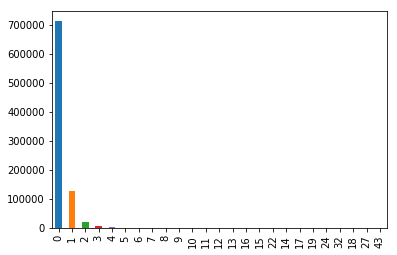

In [27]:
hist_inj = data['NUMBER OF PERSONS INJURED'].value_counts()
hist_inj.plot(kind='bar')

**Summary of deaths.**

In [28]:
data['NUMBER OF PERSONS KILLED'].describe()

count    877197.000000
mean          0.001051
std           0.034844
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: NUMBER OF PERSONS KILLED, dtype: float64

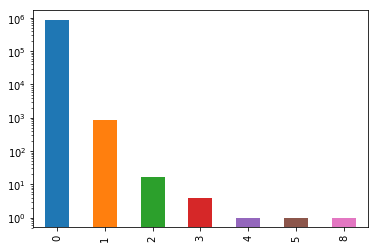

In [29]:
hist_kil = data['NUMBER OF PERSONS KILLED'].value_counts().sort_index()
hist_kil.plot(kind='bar',logy=True)

**Summary of time of accident.**

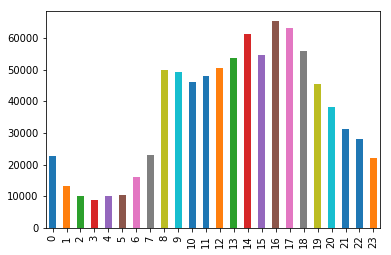

In [30]:
hist_hour = data.TIME.dt.hour.value_counts().sort_index()
hist_hour.plot(kind='bar')

In [31]:
data['CONTRIBUTING FACTOR VEHICLE 1'].unique()

array(['Passing Too Closely', 'Unspecified', 'Tire Failure/Inadequate',
       'Driver Inattention/Distraction', 'Failure to Yield Right-of-Way',
       'Backing Unsafely', 'Unsafe Lane Changing',
       'Traffic Control Disregarded', 'Passing or Lane Usage Improper',
       'Following Too Closely', 'Turning Improperly', 'Other Vehicular',
       'Shoulders Defective/Improper', 'Outside Car Distraction',
       'Driver Inexperience', 'Unsafe Speed', 'Oversized Vehicle',
       'Aggressive Driving/Road Rage', 'Failure to Keep Right',
       'Fell Asleep', 'View Obstructed/Limited',
       'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
       'Passenger Distraction', 'Obstruction/Debris',
       'Reaction to Uninvolved Vehicle', 'Brakes Defective',
       'Pavement Defective', 'Alcohol Involvement', 'Vehicle Vandalism',
       'Glare', 'Illnes', 'Lost Consciousness', nan, 'Animals Action',
       'Pavement Slippery', 'Accelerator Defective',
       'Driverless/Runaway Vehicle',

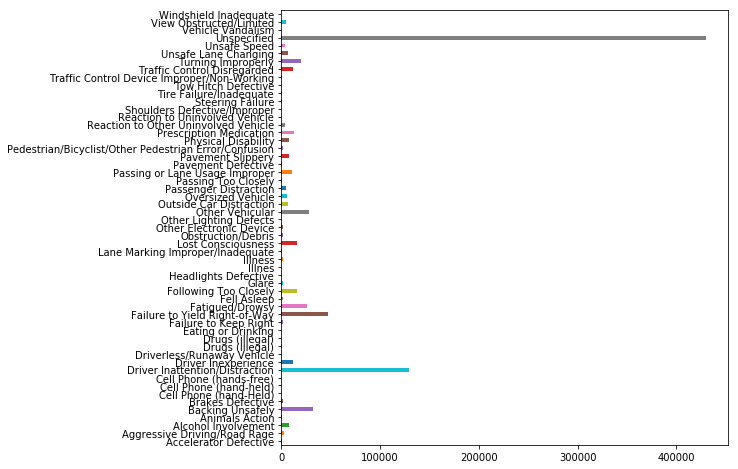

In [32]:
plt.figure(figsize=(8,8))
hist_fact = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().sort_index()
hist_fact.plot(kind='barh')

** Eyeball number of accidents **

** Map of 5 boroughs of NewYork (Source: Wikipedia)**
<center><img src='res/5_Boroughs_Labels_New_York_City_Map.svg.png' width=320></center>
<center><img src='res/boroughs.png' width=320></center>

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-74.25909,40.477399,-73.700272,40.917577&bboxSR=4326&imageSR=4326&size=600,472&dpi=96&format=png32&f=image


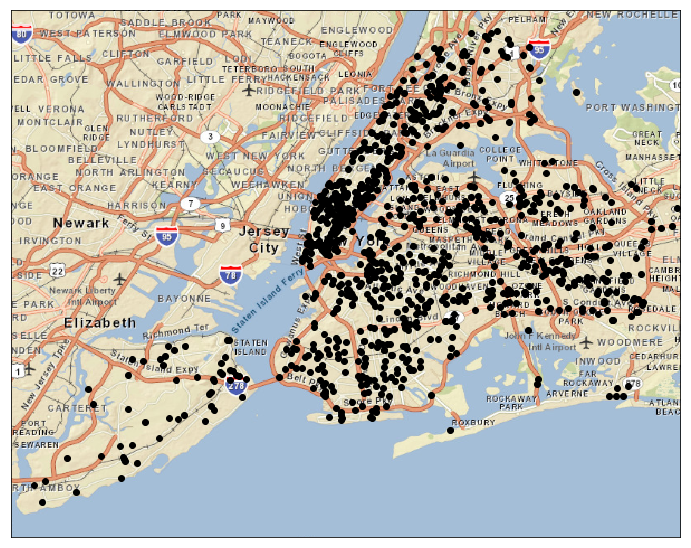

In [33]:
x = data[['LATITUDE','LONGITUDE']].sample(1000)
plt.figure(figsize=(12, 12))
m = Basemap(projection='cyl', resolution='c', llcrnrlon=-74.259090, llcrnrlat=40.477399, urcrnrlon=-73.700272, urcrnrlat=40.917577, area_thresh=0.01)
m.arcgisimage(service='ESRI_StreetMap_World_2D', xpixels=600, verbose=True)
for lat,long in x.values:
    x,y = m(long,lat)
    m.plot(x,y,'ko')
plt.show()

## Draw Conclusions using Inferential Statistics

## Some technical terms to keep the rest of the analysis clear
- **The Population**: Entire dataset.
- **A Sample**: Random subset drawn from the population.
- **Parameter**: A numerical summary of the population (e.g. population mean, population variance)
- **Statistic**: A numerical summary of a sample (e.g. sample mean, sample variance).

### Inference = Drawing conclusions about population parameters from sample statistics

## Q1: Does Brooklyn account for a higher fraction of hourly deaths compared to Manhattan?

In [34]:
borough_hourly_data = data.groupby(['BOROUGH',data.TIME.dt.hour]).size()

In [35]:
accidents_brooklyn = borough_hourly_data['BROOKLYN'].sort_index()
brooklyn_hourly_fractions = accidents_brooklyn.values / len(data)
brooklyn_hour_day = accidents_brooklyn.keys() 

accidents_manhattan = borough_hourly_data['MANHATTAN'].sort_index()
manhattan_hourly_fractions = accidents_manhattan.values / len(data)
manhattan_hour_day = accidents_manhattan.keys()

In [36]:
print(brooklyn_hourly_fractions.mean(), brooklyn_hourly_fractions.std())

0.012884315989832765 0.006847517296925534


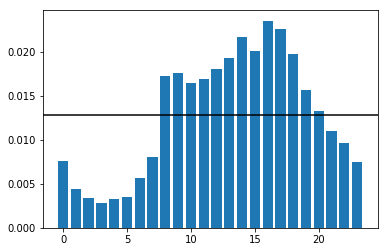

In [37]:
plt.bar(x=brooklyn_hour_day,height=brooklyn_hourly_fractions)
plt.axhline(y=brooklyn_hourly_fractions.mean(), color='k')
plt.show()

In [38]:
print(manhattan_hourly_fractions.mean(), manhattan_hourly_fractions.std())

0.01038687242812428 0.004977028003073869


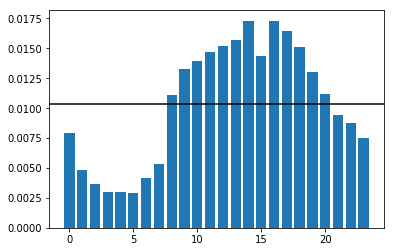

In [39]:
plt.bar(x=manhattan_hour_day,height=manhattan_hourly_fractions)
plt.axhline(y=manhattan_hourly_fractions.mean(), color='k')
plt.show()

## Q2: Do a larger fraction of accidents occur during 8AM-3PM or 3PM-8PM?

In [40]:
morn_time = (data.TIME.dt.hour >=8 ) & (data.TIME.dt.hour < 15)
eve_time = (data.TIME.dt.hour >=15 ) & (data.TIME.dt.hour <= 20)
morn_accidents = data[morn_time].TIME.dt.hour.value_counts().sort_index()
morn_accidents_frac = morn_accidents.values/len(data)
eve_accidents = data[eve_time].TIME.dt.hour.value_counts().sort_index()
eve_accidents_frac = eve_accidents.values/len(data)

In [41]:
print(morn_accidents_frac.mean(), morn_accidents_frac.std())

0.05838711258702435 0.005298203355807108


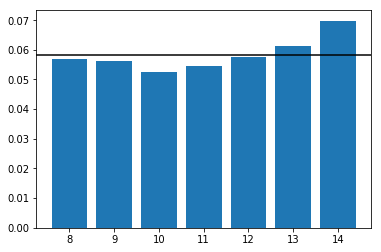

In [42]:
plt.bar(x=morn_accidents.keys(), height=morn_accidents_frac)
plt.axhline(y=morn_accidents_frac.mean(), color='k')
plt.show()

In [43]:
print(eve_accidents_frac.mean(), eve_accidents_frac.std())

0.06129903925040023 0.010840661246553123


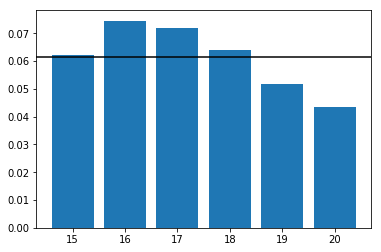

In [44]:
plt.bar(x=eve_accidents.keys(), height=eve_accidents_frac)
plt.axhline(y=eve_accidents_frac.mean(), color='k')
plt.show()

### Q1 and Q2 are instances of a commmon problem, which is:
Comparing population parameters for two subgroups
- Q1: Compare means of Brooklyn and Manhattan
- Q2: Compare means of morning and evening traffic

I call this pattern **'comparing Apples to Oranges'**

### How to compare population means of two subgroups?
**A**: Take their difference. 
**BUT the difference is a single number which doesn't give any quantifiable information about any differences between the means.**

### Trick to compare population means of two subgroups
1. Generate lots of samples from the population.
2. Split each sample in to the two groups and find group means. These means are statistics.
3. Find the difference between sample subgroup means, that is our sample statistic.
4. If we generate $n$ samples, we get $n$ sample statistics or estimates of population parameter. 
5. Plot the estimated difference.
6. Surprise!!! This is a Gaussian curve!!! (Because of the Central Limit Theorem)
7. Construct a confidence interval using the mean of sample mean differences and its standard deviation. (Wrap your head around this)

## Answering Q1

In [45]:
population1 = data

In [46]:
diff_means = []
for _ in range(1000):
    # Create a sample
    sample = population1.sample(512,replace=True)
    sample_data = sample.groupby(['BOROUGH',sample.TIME.dt.hour]).size()
    
    # Create subgroups
    sample_brooklyn  = sample_data['BROOKLYN'].sort_index()
    sample_manhattan = sample_data['MANHATTAN'].sort_index()
    
    # Create sample distribution
    sample_brooklyn_fractions = sample_brooklyn.values / len(sample)
    sample_manhattan_fractions = sample_manhattan.values / len(sample)
    
    mean_brooklyn = sample_brooklyn_fractions.mean()
    mean_manhattan = sample_manhattan_fractions.mean()
    
    diff_mean = mean_brooklyn - mean_manhattan
    diff_means.append(diff_mean)

mean of sample differences= 0.0025438638302308393 std of sample differences= 0.0015106435782207077


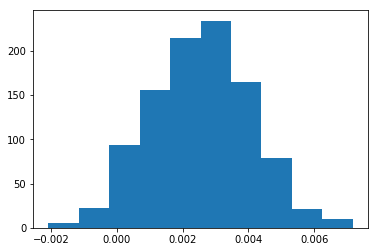

In [47]:
print('mean of sample differences=',np.mean(diff_means),'std of sample differences=',np.std(diff_means))
plt.hist(diff_means,density=False)
plt.show()

### Find a 95% confidence interval.
A 95% confidence interval is generated by leaving 2.5% of the farthest-from-mean values on both sides of a distribution.

-0.00025130562160326214 0.005436616075839919


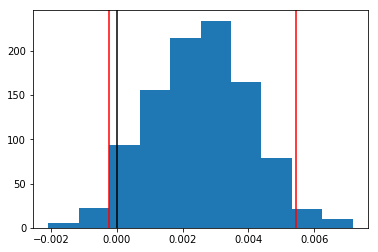

In [48]:
percentile_lo = np.percentile(diff_means,2.5)
percentile_hi = np.percentile(diff_means,97.5)
print(percentile_lo, percentile_hi)

plt.hist(diff_means,density=False)
plt.axvline(x=0.0,color='k')
plt.axvline(x=percentile_lo, color='r')
plt.axvline(x=percentile_hi, color='r')
plt.show()

The 95% percent confidence interval ranges from percentiles 2.5 to 97.5, where mean value ranges from -0.000488 to 0.00565. So we're 95% confident that the difference in means of the two subgroups lies between -0.00035 to 0.00535 with 95% probability. Since the value 0.0 lies inside the 95% interval, there is some likelihood that the two means could be equal. 

## Central limit theorem:
The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually n > 30).

## Reanswering Q1 with just 1 sample
In real life we seldom have access to the entire population, instead we have just one sample that is much smaller than the population. We can deal with this limitation using **BOOTSTRAPPING** which is a fancy name for generating synthetic samples from the only sample we have by repeated resampling with repacement.

** Use same population but take only one actual sample, bootstrap the rest. **

In [49]:
# Simulate one real sample.
actual_sample = population1.sample(4000,replace=True)

In [50]:
diff_means = []
for _ in range(1000):
    # Create a sample
    bootstrapped_sample = actual_sample.sample(512,replace=True)
    sample_data = bootstrapped_sample.groupby(['BOROUGH',bootstrapped_sample.TIME.dt.hour]).size()
    
    # Create subgroups
    sample_brooklyn  = sample_data['BROOKLYN'].sort_index()
    sample_manhattan = sample_data['MANHATTAN'].sort_index()
    
    # Create sample distribution
    sample_brooklyn_fractions = sample_brooklyn.values / len(bootstrapped_sample)
    sample_manhattan_fractions = sample_manhattan.values / len(bootstrapped_sample)
    
    mean_brooklyn = sample_brooklyn_fractions.mean()
    mean_manhattan = sample_manhattan_fractions.mean()
    
    diff_mean = mean_brooklyn - mean_manhattan
    diff_means.append(diff_mean)

mean of sample differences= 0.0030105191425094974 std of sample differences= 0.001559561780299988


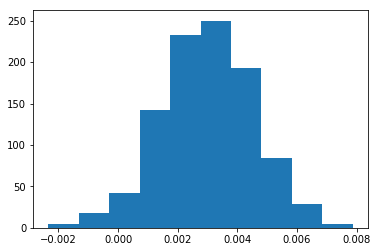

In [51]:
print('mean of sample differences=',np.mean(diff_means),'std of sample differences=',np.std(diff_means))
plt.hist(diff_means,density=False)
plt.show()

## Answering Q2

In [52]:
population2 = data

In [57]:
diff_means = []
for _ in range(1000):
    # Create a sample. In real life we will most certainly
    # bootstrap instead of repeated sampling from the
    # population itself.
    sample = population2.sample(512,replace=True)
    
    # Create subgroups
    morn_time = (sample.TIME.dt.hour >=8 ) & (sample.TIME.dt.hour < 15)
    eve_time = (sample.TIME.dt.hour >=15 ) & (sample.TIME.dt.hour <= 20)
    
    sample_morn_accidents = sample[morn_time].TIME.dt.hour.value_counts().sort_index()
    sample_eve_accidents  = sample[eve_time].TIME.dt.hour.value_counts().sort_index()
    
    # Create sample distribution
    sample_morn_fractions = sample_morn_accidents.values / len(sample)
    sample_eve_fractions  = sample_eve_accidents.values / len(sample)
    
    mean_morn = sample_morn_fractions.mean()
    mean_eve = sample_eve_fractions.mean()
    
    diff_mean = mean_morn - mean_eve
    diff_means.append(diff_mean)

mean of sample differences= -0.002886532738095238 std of sample differences= 0.00582050221240567


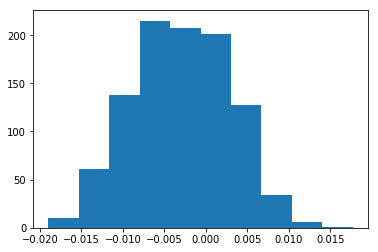

In [54]:
print('mean of sample differences=',np.mean(diff_means),'std of sample differences=',np.std(diff_means))
plt.hist(diff_means,density=False)
plt.show()

-0.013767206101190482 0.007908993675595234


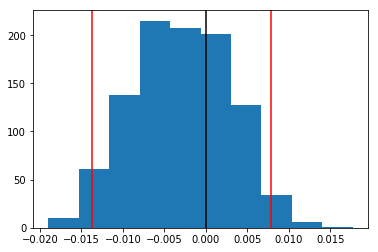

In [55]:
percentile_lo = np.percentile(diff_means,2.5)
percentile_hi = np.percentile(diff_means,97.5)
print(percentile_lo, percentile_hi)

plt.hist(diff_means,density=False)
plt.axvline(x=0.0,color='k')
plt.axvline(x=percentile_lo, color='r')
plt.axvline(x=percentile_hi, color='r')
plt.show()

In this case the 95% confidence interval spans the range from -0.0146 to 0.0083 so we're 95% confident that the difference of population means for the two subgroups will be in this range.

### Confidence intervals trade confidence for precision. Wider, imprecise inference with more confidence. Narrow, precise inference with low confidence.

## Hypothesis testing and p-values.
Like confidence intervals, hypothesis testing lets us compare Apples to Oranges. The steps for hypothesis testing are very similar to those for building confidence interval.

### Hypotheis testing
1. Generate lots of samples from the population.
2. Split each sample in to the two groups and find group means. These means are statistics.
3. Find the difference between sample subgroup means, that is our sample statistic.
4. If we generate $n$ samples, we get $n$ sample statistics or estimates of population parameter. 
5. Construct a hypotheis, for example assume that Brooklyn and Manhattan have same fraction of accidents per hour so the diffference of their population means should be zero and hence the difference of their sample means should be zero as well.
6. Use the assumed difference as mean.
7. Divide the standard deviation of sample differences, to estimate a population mean.
8. Construct a Gaussian curve with these mean and standard deviation values.
9. Calculate the probability of sample mean or a more adverse (to our hypotheis) value using this Gaussian. This is our p-value.  

## Hypothesis testing for Q1:
Hypotheis: The fraction of total accidents occuring per hour in Brooklyn is equal to or larger than the fraction for Manhattan. 
Using the same population, `population1`.

In [64]:
diff_means = []
for _ in range(1000):
    # Create a sample
    sample = population1.sample(512,replace=True)
    sample_data = sample.groupby(['BOROUGH',sample.TIME.dt.hour]).size()
    
    # Create subgroups
    sample_brooklyn  = sample_data['BROOKLYN'].sort_index()
    sample_manhattan = sample_data['MANHATTAN'].sort_index()
    
    # Create sample distribution
    sample_brooklyn_fractions = sample_brooklyn.values / len(sample)
    sample_manhattan_fractions = sample_manhattan.values / len(sample)
    
    mean_brooklyn = sample_brooklyn_fractions.mean()
    mean_manhattan = sample_manhattan_fractions.mean()
    
    diff_mean = mean_brooklyn - mean_manhattan
    diff_means.append(diff_mean)

mean of sample differences= 0.0024379720110127407 std of sample differences= 0.0014258972426684474


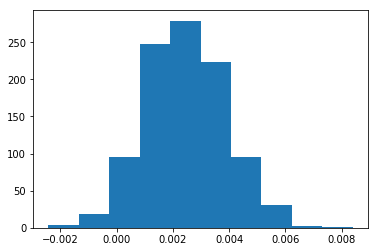

In [65]:
print('mean of sample differences=',np.mean(diff_means),'std of sample differences=',np.std(diff_means))
plt.hist(diff_means,density=False)
plt.show()

In [63]:
sampled_std  = np.std(diff_means)
population_std = sampled_std/np.sqrt(512)
sampled_mean = np.mean(diff_means)
assumed_mean = 0.0


0.002564180754156575

**The probabilty that our hypothesis is wrong is the area to the left of the line x=0.002437 on a Gaussian curve with mean 0.0 and standard deviation 0.00142**

In [68]:
from scipy.stats import norm

In [71]:
norm.cdf(x=0.002347,loc=0.0, scale=0.00142)

0.9508159333737947

The p value is huge which means our hypotheis cannot be possibly correct.

## Applications of hypothesis testing.

- A/B testing for products
- Drug testing.
- Comparing performance of two algorithms.